<h1> Precipitation data  - Location not truncated</h1>

<p>Example Script to extract raw rainfall data (in inches per month) from Ed Hawkins Rainfall Rescue Github. 1840s decade folder.
</p>


<h2>Load modules</h2>

In [2]:
#Need a conda environment with the below packaged available. 

In [3]:
##I had to directly install beautfil soup as this wasnt in my environment
#!conda install conda-forge::beautifulsoup4 -y

In [3]:
import xarray as xr
print('Imported Xarray')
import numpy as np
print('Imported numpy')
import scipy.stats as stats
print('Imported scipy.stats')
import matplotlib.pyplot as plt
print('Imported matplotlib')
import cftime
print('Imported cftime')
import math
print('Imported math')
import pandas as pd
print('Imported pandas')
from bs4 import BeautifulSoup
print('Imported BeautifulSoup')
import requests
import time
import re
from requests.auth import HTTPBasicAuth
import csv

Imported Xarray
Imported numpy
Imported scipy.stats
Imported matplotlib
Imported cftime
Imported math
Imported pandas
Imported BeautifulSoup


<h2>Open Monthly Precipitation Data</h2>

<p>Data is all on GitHub - each pdf page as a as single .csv file. Data file layout and encoding is explained on the <a href='https://github.com/ed-hawkins/rainfall-rescue/blob/master/schema.md'>schema page</a>.</p>

In [11]:
##Isolate all urls containing .csv files on monthly rainfall data

url = 'https://github.com/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS'
stringmatch = 'ALLSHEETS/1'
all_data_parent_urls=[]

response = requests.get(url)
time.sleep(2)
soup = BeautifulSoup(response.content, 'html.parser')
for link in soup.findAll('a', href=True):
    if stringmatch in link.get('href'):
        #print(link.get('href'))
        all_data_parent_urls.append(link.get('href')) 

In [12]:
##should have 15 unique parent urls
all_data_parent_urls=list(set(all_data_parent_urls))
len(all_data_parent_urls)

15

In [13]:
all_data_parent_urls

['/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1930s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1830s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1950s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1677s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1870s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1920s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1910s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1860s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1940s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1840s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1820s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1900s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1850s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1890s',
 '/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1880s']

<h2>Create text files containing all the possible file names</h2>

<h3>1840s</h3>

In [14]:
DECADE=str('1840s')

In [15]:
##there is probably a better way to index the needed url, I just counted and manually entered the index. 
url='https://github.com'+str(all_data_parent_urls[9])
print('Manually Check for truncating '+str(url))

Manually Check for truncating https://github.com/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1840s


<p> Not truncated </p>

In [16]:
print('Sourcing from: '+str(url))
##Get all parent file names
stringmatch='TYRain_'
parent_files=[]
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
for link in soup.findAll('a', href=True):
    if stringmatch in link.get_text():
        #print(link.get_text())
        parent_files.append(link.get_text()) 

Sourcing from: https://github.com/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1840s


<h4>Create list of raw data locations</h4>

In [17]:
len(parent_files)

200

In [18]:
raw_parent_string='https://raw.githubusercontent.com/ed-hawkins/rainfall-rescue/master/ALLSHEETS/'

In [19]:
##All possible filenames
raw_urls_1840s_all=[str(raw_parent_string)+str(DECADE)+'/'+str(i) for i in parent_files]

In [20]:
raw_urls_1840s_all[130]

'https://raw.githubusercontent.com/ed-hawkins/rainfall-rescue/master/ALLSHEETS/1840s/TYRain_1840-1849_D_pt2-158.csv'

In [21]:
len(raw_urls_1840s_all)

200

<h4>Remove raw data locations that dont exist</h4>

In [22]:
##remove filenames that dont actually exist
##Due to large volume of requests being sent use auth and build in sleep if/when rate limiting is hit
errors=[]
for i in range(len(raw_urls_1840s_all)):
    try:
        response=requests.get(raw_urls_1840s_all[i],auth=HTTPBasicAuth('YOURUSERNAME', 'YOURAUTHCODE'))
        response.raise_for_status()
    except Exception as e:
        ##if rate limited wait an hour
        if response.status_code == 429:
            print('5000 requests hit, sleep for an hour')
            time.sleep(60)
        #if doesnt exist then collect the filename
        if response.status_code == 404:
            errors.append(raw_urls_1840s_all[i])
        #if something weird has happened then let me know
        else:
            print('Error unaccounted for: code '+str(response.status_code)+' . Url: '+str(raw_urls_1840s_all[i]))

In [23]:
# ##should be about 0 blank pages
len(errors)

0

In [24]:
##collate raw locations that exist

In [25]:
#create clean raw list - no empty hits contained
raw_urls_1840s=[i for i in raw_urls_1840s_all if i not in errors]

In [26]:
len(raw_urls_1840s)

200

<h4>Save this</h4>

In [27]:
##save this as a csv file

In [28]:
np.savetxt('raw_urls_1840s.csv',raw_urls_1840s,delimiter =',',fmt ='% s')

In [29]:
# #tidy up large unneeded lists
# del raw_urls_1840s_all, errors, filenames_1840s

In [30]:
# raw_urls_1840s[-100:]

<h4>Open the raw data and collate it into a single dataframe for the entire decade</h4>

In [31]:
##Open the raw urls and convert to list
raw_urls_1840s=pd.read_csv('raw_urls_1840s.csv',header=None,delimiter =',')
raw_urls_1840s=[i for i in raw_urls_1840s[0]]

In [32]:
len(raw_urls_1840s)

200

In [33]:
## Collect up all raw data for this decade
##**this cell takes half an hour to run**

In [34]:
##create a dataframe with the rainfall monthly csv data (not total or diffs)
all_raw_data_1840s=[]

for url in raw_urls_1840s:
    df = pd.read_csv(url,skiprows=3,nrows=12,header=1,index_col=0,delimiter=',',usecols=[0,1,2,3,4,5,6,7,8,9,10])
    all_raw_data_1840s.append(df)

In [35]:
len(all_raw_data_1840s)

200

In [36]:
all_raw_data_1840s[-1]

,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
January,1.54,0.54,1.37,0.00,1.43,0.89,1.99,NaN,NaN,NaN
February,1.44,1.06,0.91,1.67,1.80,0.10,0.24,NaN,NaN,NaN
March,0.70,2.49,2.24,0.50,0.98,1.80,0.99,NaN,NaN,NaN
April,0.69,1.59,1.82,1.92,0.25,1.27,2.30,NaN,NaN,NaN
May,3.31,2.03,2.99,3.67,0.20,1.91,0.65,NaN,NaN,NaN
June,1.19,2.18,1.23,2.66,0.74,2.72,0.91,NaN,NaN,NaN
July,3.14,3.66,1.74,1.53,2.87,3.00,2.54,NaN,NaN,NaN
August,0.75,1.76,1.05,1.33,1.95,2.74,2.45,NaN,NaN,NaN
September,1.33,3.97,3.55,0.22,0.96,1.69,0.13,NaN,NaN,NaN
October,1.95,4.42,0.54,3.30,1.54,1.83,2.11,NaN,NaN,NaN


In [37]:
#all_raw_data_1840s[2400:2401]

In [38]:
##collect up all the years
grouped_by_yr_1840s=pd.concat(all_raw_data_1840s, axis=0, ignore_index=False)

In [39]:
#put the month as a new index
grouped_by_yr_1840s.reset_index(inplace=True)

In [40]:
grouped_by_yr_1840s=grouped_by_yr_1840s.rename(columns={'index': 'MONTH'})
grouped_by_yr_1840s

,MONTH,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60
1,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.06
2,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.78
3,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.13
4,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.39
...,...,...,...,...,...,...,...,...,...,...,...
2395,August,0.75,1.76,1.05,1.33,1.95,2.74,2.45,NaN,NaN,NaN
2396,September,1.33,3.97,3.55,0.22,0.96,1.69,0.13,NaN,NaN,NaN
2397,October,1.95,4.42,0.54,3.30,1.54,1.83,2.11,NaN,NaN,NaN
2398,November,2.91,2.47,2.89,2.10,0.52,0.55,0.56,NaN,NaN,NaN


In [41]:
#Group data into lists organised by month and year
grouped_by_monthyr_1840s=grouped_by_yr_1840s.groupby('MONTH').agg(list)
grouped_by_monthyr_1840s

,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
MONTH,,,,,,,,,,
April,"[nan, nan, nan, nan, 0.18, 0.18, nan, nan, 0.0...","[nan, nan, 1.79, 1.79, nan, nan, 1.42, 1.42, 1...","[nan, nan, 1.83, 1.83, nan, nan, 0.47, 0.47, 0...","[nan, nan, 1.85, 1.85, nan, nan, 1.65, 1.65, 2...","[nan, nan, 0.38, 0.38, nan, nan, 0.53, 0.53, 0...","[nan, nan, 0.78, 0.78, nan, nan, 1.5, 1.5, 1.2...","[nan, nan, nan, nan, nan, nan, 3.31, 3.31, 2.7...","[nan, nan, nan, nan, nan, nan, 0.91, 0.91, 1.3...","[nan, nan, nan, nan, nan, nan, 4.42, 4.42, 2.7...","[3.13, 3.13, nan, nan, nan, nan, 2.45, 2.45, 2..."
August,"[nan, nan, nan, nan, 1.33, 1.33, nan, nan, 1.3...","[nan, nan, 2.25, 2.25, nan, nan, 2.84, 2.84, 3...","[nan, nan, nan, nan, nan, nan, 1.44, 1.44, 2.1...","[nan, nan, 3.15, 3.15, nan, nan, 5.02, 5.02, 2...","[nan, nan, 1.59, 1.59, nan, nan, 2.49, 2.49, 2...","[nan, nan, 2.36, 2.36, nan, nan, 2.53, 2.53, 2...","[nan, nan, nan, nan, nan, nan, 1.86, 1.86, 3.6...","[nan, nan, nan, nan, nan, nan, 2.53, 2.53, 1.4...","[nan, nan, nan, nan, nan, nan, 4.74, 4.74, 3.1...","[0.93, 0.93, nan, nan, nan, nan, 0.77, 0.77, 1..."
December,"[nan, nan, nan, nan, 0.52, 0.52, nan, nan, 0.5...","[nan, nan, 1.87, 1.87, nan, nan, 2.27, 2.27, 3...","[nan, nan, nan, nan, nan, nan, 0.79, 0.79, 1.1...","[nan, nan, 0.44, 0.44, nan, nan, 0.67, 0.67, 0...","[nan, nan, 0.34, 0.34, nan, nan, 1.06, 1.06, 0...","[nan, nan, nan, nan, nan, nan, 2.34, 2.34, 2.8...","[nan, nan, nan, nan, nan, nan, 1.98, 1.98, 1.0...","[nan, nan, nan, nan, nan, nan, 1.73, 1.73, 2.5...","[nan, nan, nan, nan, nan, nan, 2.33, 2.33, 2.3...","[1.93, 1.93, nan, nan, nan, nan, 3.2, 3.2, 2.7..."
February,"[nan, nan, nan, nan, 1.41, 1.41, nan, nan, 1.2...","[nan, nan, 0.78, 0.78, nan, nan, 1.16, 1.16, 1...","[nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.64,...","[nan, nan, 2.23, 2.23, nan, nan, 3.14, 3.14, 1...","[nan, nan, 2.03, 2.03, nan, nan, 2.34, 2.34, 3...","[nan, nan, 1.12, 1.12, nan, nan, 1.21, 1.21, 0...","[nan, nan, nan, nan, nan, nan, 1.02, 1.02, 1.1...","[nan, nan, nan, nan, nan, nan, 1.56, 1.56, 1.3...","[nan, nan, nan, nan, nan, nan, 3.0, 3.0, 3.39,...","[2.06, 2.06, nan, nan, nan, nan, 2.43, 2.43, 2..."
January,"[nan, nan, nan, nan, 3.12, 3.12, nan, nan, 2.9...","[nan, nan, 2.28, 2.28, nan, nan, 3.0, 3.0, 2.3...","[nan, nan, nan, nan, nan, nan, 1.46, 1.46, 1.5...","[nan, nan, 1.2, 1.2, nan, nan, 1.48, 1.48, 1.1...","[nan, nan, 2.63, 2.63, nan, nan, 2.35, 2.35, 2...","[nan, nan, 2.78, 2.78, nan, nan, 1.6, 1.6, 2.7...","[nan, nan, nan, nan, nan, nan, 2.51, 2.51, 3.9...","[nan, nan, nan, nan, nan, nan, 1.54, 1.54, 1.7...","[nan, nan, nan, nan, nan, nan, 1.55, 1.55, 1.1...","[1.6, 1.6, nan, nan, nan, nan, 1.8, 1.8, 2.2, ..."
July,"[nan, nan, nan, nan, 1.47, 1.47, nan, nan, 1.2...","[nan, nan, 2.86, 2.86, nan, nan, 3.03, 3.03, 3...","[nan, nan, nan, nan, nan, nan, 2.72, 2.72, 3.5...","[nan, nan, 2.48, 2.48, nan, nan, 2.13, 2.13, 3...","[nan, nan, 2.88, 2.88, nan, nan, 2.73, 2.73, 2...","[nan, nan, 2.07, 2.07, nan, nan, 1.81, 1.81, 2...","[nan, nan, nan, nan, nan, nan, 0.94, 0.94, 1.3...","[nan, nan, nan, nan, nan, nan, 0.28, 0.28, 0.9...","[nan, nan, nan, nan, nan, nan, 1.3, 1.3, 2.34,...","[2.83, 2.83, nan, nan, nan, nan, 1.92, 1.92, 2..."
June,"[nan, nan, nan, nan, 2.05, 2.05, nan, nan, 1.3...","[nan, nan, 1.84, 1.84, nan, nan, 2.89, 2.89, 3...","[nan, nan, nan, nan, nan, nan, 1.44, 1.44, 2.2...","[nan, nan, 1.07, 1.07, nan, nan, 1.69, 1.69, 1...","[nan, nan, 1.45, 1.45, nan, nan, 2.45, 2.45, 1...","[nan, nan, nan, nan, nan, nan, 1.48, 1.48, 2.5...","[nan, nan, nan, nan, nan, nan, 1.01, 1.01, 0.3...","[nan, nan, nan, nan, nan, nan, 1.49, 1.49, 2.3...","[nan, nan, nan, nan, nan, nan, 2.92, 2.92, 3.6...","[0.62, 0.62, nan, nan, nan, nan, 0.7, 0.7, 0.5..."
March,"[nan, nan, nan, nan, 0.37, 0.37, nan, nan, 0.4...","[nan, nan, 1.22, 1.22, nan, nan, 1.12, 1.12, 1...","[nan, nan, nan, nan, nan, nan, 1.97, 1.97, 2.6...","[nan, nan, 0.32, 0.32, nan, nan, 0.54, 0.54, 0...","[nan, nan, 2.35, 2.35, nan, n

In [42]:
##Create a timeaxis for the decade of interest
time_ax=pd.date_range('1840-01-01', freq='M', periods=120)

In [43]:
time_ax

DatetimeIndex(['1840-01-31', '1840-02-29', '1840-03-31', '1840-04-30',
               '1840-05-31', '1840-06-30', '1840-07-31', '1840-08-31',
               '1840-09-30', '1840-10-31',
               ...
               '1849-03-31', '1849-04-30', '1849-05-31', '1849-06-30',
               '1849-07-31', '1849-08-31', '1849-09-30', '1849-10-31',
               '1849-11-30', '1849-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

In [44]:
##Extract the data from the 2D year by month into a 1D timeseries
timeseries_1840s=[]
for i in range(len(time_ax)):
    YR=time_ax[i].year
    MNTH=pd.to_datetime(time_ax[i].month, format='%m').month_name()
    #print(str(YR)+' '+str(MNTH))
    data=grouped_by_monthyr_1840s[str(YR)].loc[[str(MNTH)]].to_list()[0]
    timeseries_1840s.append(data)

In [45]:
len(timeseries_1840s)

120

In [46]:
#dummy coord for data station
dummy_loc=np.arange(len(timeseries_1840s[0]))

In [47]:
grouped_by_monthyr_1840s

,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
MONTH,,,,,,,,,,
April,"[nan, nan, nan, nan, 0.18, 0.18, nan, nan, 0.0...","[nan, nan, 1.79, 1.79, nan, nan, 1.42, 1.42, 1...","[nan, nan, 1.83, 1.83, nan, nan, 0.47, 0.47, 0...","[nan, nan, 1.85, 1.85, nan, nan, 1.65, 1.65, 2...","[nan, nan, 0.38, 0.38, nan, nan, 0.53, 0.53, 0...","[nan, nan, 0.78, 0.78, nan, nan, 1.5, 1.5, 1.2...","[nan, nan, nan, nan, nan, nan, 3.31, 3.31, 2.7...","[nan, nan, nan, nan, nan, nan, 0.91, 0.91, 1.3...","[nan, nan, nan, nan, nan, nan, 4.42, 4.42, 2.7...","[3.13, 3.13, nan, nan, nan, nan, 2.45, 2.45, 2..."
August,"[nan, nan, nan, nan, 1.33, 1.33, nan, nan, 1.3...","[nan, nan, 2.25, 2.25, nan, nan, 2.84, 2.84, 3...","[nan, nan, nan, nan, nan, nan, 1.44, 1.44, 2.1...","[nan, nan, 3.15, 3.15, nan, nan, 5.02, 5.02, 2...","[nan, nan, 1.59, 1.59, nan, nan, 2.49, 2.49, 2...","[nan, nan, 2.36, 2.36, nan, nan, 2.53, 2.53, 2...","[nan, nan, nan, nan, nan, nan, 1.86, 1.86, 3.6...","[nan, nan, nan, nan, nan, nan, 2.53, 2.53, 1.4...","[nan, nan, nan, nan, nan, nan, 4.74, 4.74, 3.1...","[0.93, 0.93, nan, nan, nan, nan, 0.77, 0.77, 1..."
December,"[nan, nan, nan, nan, 0.52, 0.52, nan, nan, 0.5...","[nan, nan, 1.87, 1.87, nan, nan, 2.27, 2.27, 3...","[nan, nan, nan, nan, nan, nan, 0.79, 0.79, 1.1...","[nan, nan, 0.44, 0.44, nan, nan, 0.67, 0.67, 0...","[nan, nan, 0.34, 0.34, nan, nan, 1.06, 1.06, 0...","[nan, nan, nan, nan, nan, nan, 2.34, 2.34, 2.8...","[nan, nan, nan, nan, nan, nan, 1.98, 1.98, 1.0...","[nan, nan, nan, nan, nan, nan, 1.73, 1.73, 2.5...","[nan, nan, nan, nan, nan, nan, 2.33, 2.33, 2.3...","[1.93, 1.93, nan, nan, nan, nan, 3.2, 3.2, 2.7..."
February,"[nan, nan, nan, nan, 1.41, 1.41, nan, nan, 1.2...","[nan, nan, 0.78, 0.78, nan, nan, 1.16, 1.16, 1...","[nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.64,...","[nan, nan, 2.23, 2.23, nan, nan, 3.14, 3.14, 1...","[nan, nan, 2.03, 2.03, nan, nan, 2.34, 2.34, 3...","[nan, nan, 1.12, 1.12, nan, nan, 1.21, 1.21, 0...","[nan, nan, nan, nan, nan, nan, 1.02, 1.02, 1.1...","[nan, nan, nan, nan, nan, nan, 1.56, 1.56, 1.3...","[nan, nan, nan, nan, nan, nan, 3.0, 3.0, 3.39,...","[2.06, 2.06, nan, nan, nan, nan, 2.43, 2.43, 2..."
January,"[nan, nan, nan, nan, 3.12, 3.12, nan, nan, 2.9...","[nan, nan, 2.28, 2.28, nan, nan, 3.0, 3.0, 2.3...","[nan, nan, nan, nan, nan, nan, 1.46, 1.46, 1.5...","[nan, nan, 1.2, 1.2, nan, nan, 1.48, 1.48, 1.1...","[nan, nan, 2.63, 2.63, nan, nan, 2.35, 2.35, 2...","[nan, nan, 2.78, 2.78, nan, nan, 1.6, 1.6, 2.7...","[nan, nan, nan, nan, nan, nan, 2.51, 2.51, 3.9...","[nan, nan, nan, nan, nan, nan, 1.54, 1.54, 1.7...","[nan, nan, nan, nan, nan, nan, 1.55, 1.55, 1.1...","[1.6, 1.6, nan, nan, nan, nan, 1.8, 1.8, 2.2, ..."
July,"[nan, nan, nan, nan, 1.47, 1.47, nan, nan, 1.2...","[nan, nan, 2.86, 2.86, nan, nan, 3.03, 3.03, 3...","[nan, nan, nan, nan, nan, nan, 2.72, 2.72, 3.5...","[nan, nan, 2.48, 2.48, nan, nan, 2.13, 2.13, 3...","[nan, nan, 2.88, 2.88, nan, nan, 2.73, 2.73, 2...","[nan, nan, 2.07, 2.07, nan, nan, 1.81, 1.81, 2...","[nan, nan, nan, nan, nan, nan, 0.94, 0.94, 1.3...","[nan, nan, nan, nan, nan, nan, 0.28, 0.28, 0.9...","[nan, nan, nan, nan, nan, nan, 1.3, 1.3, 2.34,...","[2.83, 2.83, nan, nan, nan, nan, 1.92, 1.92, 2..."
June,"[nan, nan, nan, nan, 2.05, 2.05, nan, nan, 1.3...","[nan, nan, 1.84, 1.84, nan, nan, 2.89, 2.89, 3...","[nan, nan, nan, nan, nan, nan, 1.44, 1.44, 2.2...","[nan, nan, 1.07, 1.07, nan, nan, 1.69, 1.69, 1...","[nan, nan, 1.45, 1.45, nan, nan, 2.45, 2.45, 1...","[nan, nan, nan, nan, nan, nan, 1.48, 1.48, 2.5...","[nan, nan, nan, nan, nan, nan, 1.01, 1.01, 0.3...","[nan, nan, nan, nan, nan, nan, 1.49, 1.49, 2.3...","[nan, nan, nan, nan, nan, nan, 2.92, 2.92, 3.6...","[0.62, 0.62, nan, nan, nan, nan, 0.7, 0.7, 0.5..."
March,"[nan, nan, nan, nan, 0.37, 0.37, nan, nan, 0.4...","[nan, nan, 1.22, 1.22, nan, nan, 1.12, 1.12, 1...","[nan, nan, nan, nan, nan, nan, 1.97, 1.97, 2.6...","[nan, nan, 0.32, 0.32, nan, nan, 0.54, 0.54, 0...","[nan, nan, 2.35, 2.35, nan, n

In [48]:
##Sanity Check
grouped_by_monthyr_1840s['1840'].loc[['April']].to_list()[0][7]-timeseries_1840s[3][7]

nan

In [49]:
##Create a dataframe with time_ax as coord and 'empty' as data. 
precip_1840s=xr.DataArray(data=np.asarray(timeseries_1840s),coords={'time':time_ax,'site_index':dummy_loc},dims=['time','site_index'],name='monthly_precip',attrs={'DataSource':'Ed Hawkins Rainfall Rescue. GitHub directory for 1840s data. https://github.com/ed-hawkins/rainfall-rescue/tree/master/ALLSHEETS/1840s','Site_index':'Corresponds to row number of raw url from where data is sourced (raw_urls_1840s.csv).','Units':'inches/month'})

In [50]:
precip_1840s

<xarray.DataArray 'monthly_precip' (time: 120, site_index: 200)>
array([[      nan,       nan,       nan, ...,  2.64e+00,  1.54e+00,
         1.54e+00],
       [      nan,       nan,       nan, ...,  1.40e+00,  1.44e+00,
         1.44e+00],
       [      nan,       nan,       nan, ..., -9.99e+02,  7.00e-01,
         7.00e-01],
       ...,
       [ 2.16e+00,  2.16e+00,       nan, ...,  1.58e+00,       nan,
              nan],
       [ 1.08e+00,  1.08e+00,       nan, ...,  9.40e-01,       nan,
              nan],
       [ 1.93e+00,  1.93e+00,       nan, ...,  2.45e+00,       nan,
              nan]])
Coordinates:
  * time        (time) datetime64[ns] 1840-01-31 1840-02-29 ... 1849-12-31
  * site_index  (site_index) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198 199
Attributes:
    DataSource:  Ed Hawkins Rainfall Rescue. GitHub directory for 1840s data....
    Site_index:  Corresponds to row number of raw url from where data is sour...
    Units:       inches/month

In [51]:
####some nan data is encoded as -999, so set these to np.nans
precip_1840s=(precip_1840s.where(precip_1840s>=0))

In [52]:
precip_1840s

<xarray.DataArray 'monthly_precip' (time: 120, site_index: 200)>
array([[ nan,  nan,  nan, ..., 2.64, 1.54, 1.54],
       [ nan,  nan,  nan, ..., 1.4 , 1.44, 1.44],
       [ nan,  nan,  nan, ...,  nan, 0.7 , 0.7 ],
       ...,
       [2.16, 2.16,  nan, ..., 1.58,  nan,  nan],
       [1.08, 1.08,  nan, ..., 0.94,  nan,  nan],
       [1.93, 1.93,  nan, ..., 2.45,  nan,  nan]])
Coordinates:
  * time        (time) datetime64[ns] 1840-01-31 1840-02-29 ... 1849-12-31
  * site_index  (site_index) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198 199
Attributes:
    DataSource:  Ed Hawkins Rainfall Rescue. GitHub directory for 1840s data....
    Site_index:  Corresponds to row number of raw url from where data is sour...
    Units:       inches/month

In [53]:
##double check no -999 values left
np.sum(precip_1840s<0)

<xarray.DataArray 'monthly_precip' ()>
array(0)

In [54]:
grouped_by_monthyr_1840s.shape

(12, 10)

In [55]:
precip_1840s.shape

(120, 200)

In [56]:
# ##Save this
precip_1840s.to_netcdf(path='RainfallRescue_1840s.cdf', mode='w',)

In [57]:
##Open Data

In [58]:
precip_1840s=xr.open_dataset('RainfallRescue_1840s.cdf')

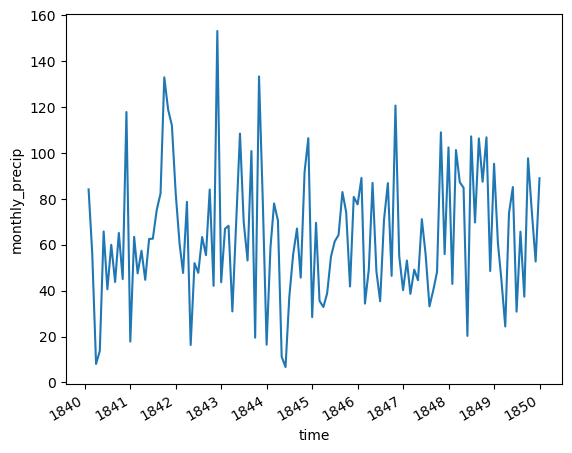

In [59]:
(precip_1840s.mean('site_index').resample(time='M').mean().monthly_precip*25.4).plot()   #converted from inches to mm

<p>This can be visually compared to <a href='https://github.com/ed-hawkins/rainfall-rescue/blob/master/REGIONAL-TIMESERIES/uk_rainfall.png'>UK monthly mean graphic on Github.</a></p>